### KoNLPy
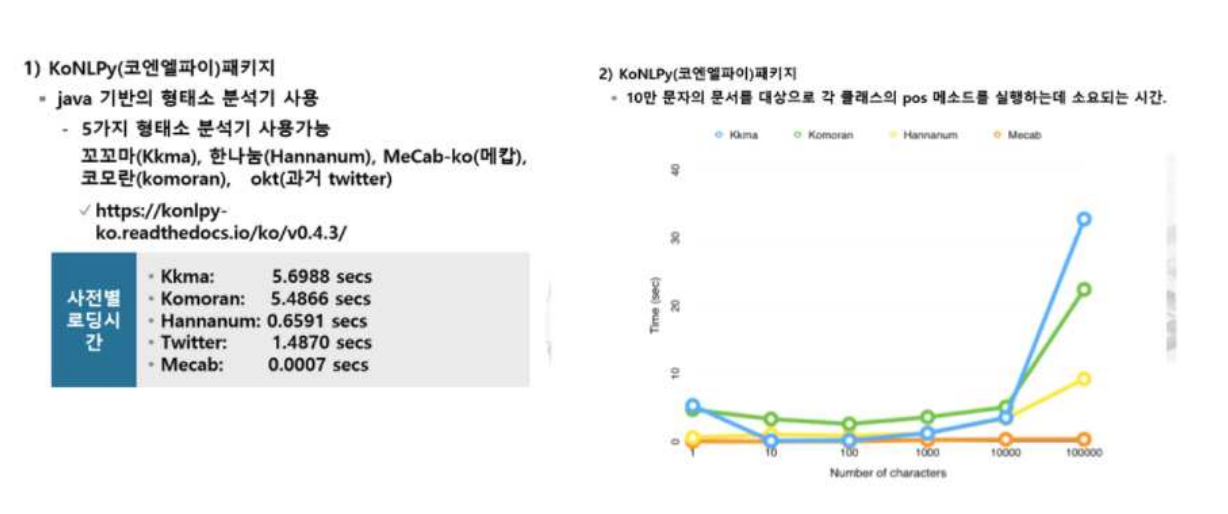

In [15]:
from konlpy.tag import Okt
f=open('./빅카인즈_코로나.txt', 'r' , encoding='utf-8')
txt=f.read() #readline(), readlines()
f.close
okt=Okt()
re=okt.nouns(txt)
re[:10]

['소상', '공인', '파주시', '매출', '액', '원금', '종사', '코로나', '끝', '사업자']

In [16]:
len(re)

548577

In [17]:
#글자 수 제한
글자의길이조건준자료=[]
for i in range(len(re)):
    if len(re[i])>=2:
        글자의길이조건준자료.append(re[i]) 
글자의길이조건준자료[:10]

['소상', '공인', '파주시', '매출', '원금', '종사', '코로나', '사업자', '사업', '최종환']

In [18]:
##### 리스트 자료 문자열로 변환
re1=' '.join(글자의길이조건준자료)
re1[:50]

'소상 공인 파주시 매출 원금 종사 코로나 사업자 사업 최종환 택시 종사 출생 상공 학습 교'

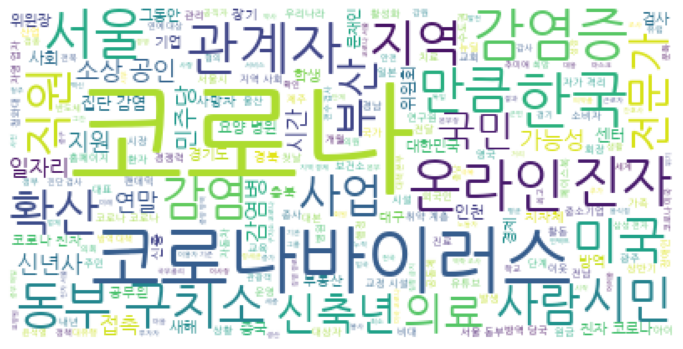

In [49]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)


wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(re1) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.show()

## 단어 집계
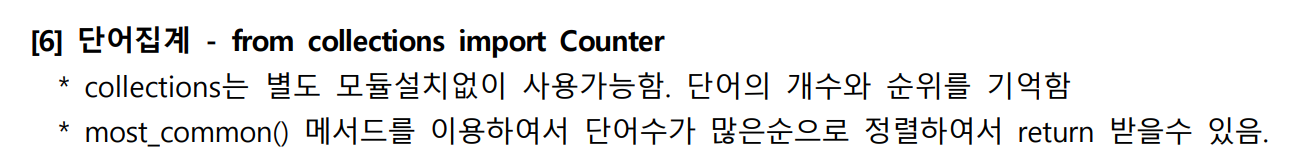

In [20]:
from collections import Counter

In [21]:
re2=re1.split(' ') 
top=50
cnt = Counter(re2)
top_=cnt.most_common(top)
top_[:5]

[('코로나', 20338), ('진자', 4523), ('서울', 3714), ('코로나바이러스', 3414), ('한국', 2754)]

In [41]:
# 단어집계 데이터프레임으로 바꾸기
import pandas as pd
df=pd.DataFrame(top_, columns=['word','freq'])
display(df)

,word,freq
0,코로나,20338
1,진자,4523
2,서울,3714
3,코로나바이러스,3414
4,한국,2754
5,지역,2449
6,방역,2396
7,구치소,2342
8,감염,2336
9,미국,2298


In [42]:
df

,word,freq
0,코로나,20338
1,진자,4523
2,서울,3714
3,코로나바이러스,3414
4,한국,2754
5,지역,2449
6,방역,2396
7,구치소,2342
8,감염,2336
9,미국,2298


In [46]:
#코로나,코로나바이러스 단어제거
fillter=((df['word']!='코로나') &(df['word']!='코로나바이러스'))
df[fillter]

,word,freq
1,진자,4523
2,서울,3714
4,한국,2754
5,지역,2449
6,방역,2396
7,구치소,2342
8,감염,2336
9,미국,2298
10,감염증,2289
11,시설,1672


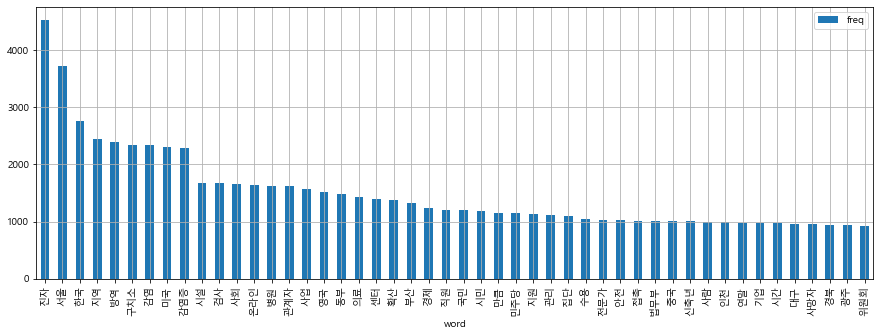

In [76]:
df[fillter].set_index('word').plot(kind='bar', figsize=(15,5))
plt.grid()


### 단어 집계 시각화

In [55]:
!pip install nltk

  Using cached click-8.1.3-py3-none-any.whl (96 kB)


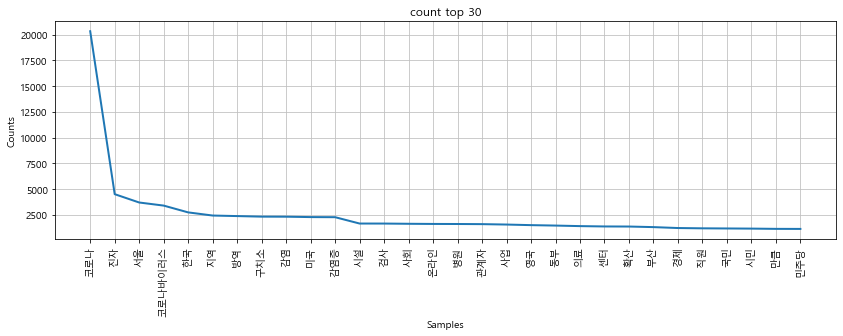

In [68]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,4) #차트 전체크기
plt.rc('font', family='Malgun Gothic')

top=30
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(re1)) # 문자열을 읽어야함.정리다된 자료로 작업함

plt.title('count top ' + str(top))
text.plot(30)
plt.show()